In [ ]:
# Load Data and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter, OrderedDict
import nltk
from nltk.corpus import stopwords
from google.colab import files
import string
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import itertools
!rm kungflu*.csv
!rm goback2yourcountry*.csv
!rm chinavirus5000*.csv
!rm virus5000*.csv
!rm chink5000*.csv
# Upload kung flu csv
kungFlu = files.upload()

# Upload go back to your country csv
goBack = files.upload()

# Upload china virus csv
chinaVirus = files.upload()

# Upload virus csv
Virus = files.upload()


# Upload chink csv
chink = files.upload()

rm: cannot remove 'kungflu*.csv': No such file or directory
rm: cannot remove 'goback2yourcountry*.csv': No such file or directory
rm: cannot remove 'chinavirus5000*.csv': No such file or directory
rm: cannot remove 'virus5000*.csv': No such file or directory
rm: cannot remove 'chink5000*.csv': No such file or directory


Saving kungflu2900.csv to kungflu2900.csv


Saving virus5000.csv to virus5000.csv


Saving chinavirus5000.csv to chinavirus5000.csv


Saving chink5000.csv to chink5000.csv


Saving goback2yourcountry92.csv to goback2yourcountry92.csv


In [ ]:
# Load data to pandas df
kungflu_df = pd.read_csv("kungflu2900.csv", index_col=0)
goback_df = pd.read_csv("goback2yourcountry92.csv", index_col=0)
chinavirus_df = pd.read_csv("chinavirus5000.csv", index_col=0)
virus_df = pd.read_csv("virus5000.csv", index_col=0)
chink_df = pd.read_csv("chink5000.csv", index_col=0)
dfs = [kungflu_df, goback_df, chinavirus_df, virus_df, chink_df]

hate_df = pd.concat(dfs, axis=0, ignore_index=True)

In [ ]:
hate_df = hate_df.rename(columns={'Tweet Id': 'Tweet_Id'})
hate_df.head()

,Datetime,Tweet_Id,Text,Username,Location
0,2021-11-29 00:08:27+00:00,1465110371442831360,@KaitMarieox Biden didn’t give it a racist nam...,blaise391,"Great Neck, NY"
1,2021-11-28 21:11:00+00:00,1465065715631804420,"@hunzvi4 What about ""Kung flu""?",SC_Blues_RESIST,"South Carolina, USA"
2,2021-11-28 19:24:18+00:00,1465038861315330056,@RamonSanchez18 “Kung Flu”?,EvanMHarris,NJ
3,2021-11-28 18:57:54+00:00,1465032219291000838,#VaccineMandate\n\n#COVIDIOTS\n\n#coronavirus\...,Assassi41090130,"Washington, DC"
4,2021-11-28 18:50:02+00:00,1465030237335474180,@nytimes Some experts are pointing hopefully t...,ny_tames,New York


In [ ]:
len(hate_df)

18013

## **Word Frequency Analysis**

In [ ]:
# get stopwords from nltk library
nltk.download('stopwords')
stop_words = set( stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Cleaning the tweets and removing the stop words
hate_df['cleaned_tweets'] = hate_df['Text'].apply(lambda x :x.translate(str.maketrans('', '', string.punctuation))) # remove punctuation
hate_df['cleaned_tweets'] = hate_df['cleaned_tweets'].apply(lambda x :x.lower())                                              # make lower
hate_df['cleaned_tweets'] = hate_df['cleaned_tweets'].apply(word_tokenize).apply(set).apply(list)                    # make a unique list of words

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 
    
hate_df['cleaned_tweets'] =  hate_df['cleaned_tweets'].apply(remove_stopwords)
 

In [ ]:
hate_df.head(5)

,Datetime,Tweet_Id,Text,Username,Location,cleaned_tweets
0,2021-11-29 00:08:27+00:00,1465110371442831360,@KaitMarieox Biden didn’t give it a racist nam...,blaise391,"Great Neck, NY","[trump, biden, racist, kung, called, kitten, v..."
1,2021-11-28 21:11:00+00:00,1465065715631804420,"@hunzvi4 What about ""Kung flu""?",SC_Blues_RESIST,"South Carolina, USA","[kung, hunzvi4, flu]"
2,2021-11-28 19:24:18+00:00,1465038861315330056,@RamonSanchez18 “Kung Flu”?,EvanMHarris,NJ,"[”, kung, “, ramonsanchez18, flu]"
3,2021-11-28 18:57:54+00:00,1465032219291000838,#VaccineMandate\n\n#COVIDIOTS\n\n#coronavirus\...,Assassi41090130,"Washington, DC","[vaccinemandate, chinaflu, asian, blame, https..."
4,2021-11-28 18:50:02+00:00,1465030237335474180,@nytimes Some experts are pointing hopefully t...,ny_tames,New York,"[africa, experts, variant, far, early, signs, ..."


In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
hate_df['Text'] = hate_df['Text'].apply(lambda x: cleaning_URLs(x))
hate_df.tail(5)

,Datetime,Tweet_Id,Text,Username,Location,cleaned_tweets
18008,2019-01-26 16:32:36+00:00,1089199436545359873,@__Chink I see getting naked that’s extra lit,St0neC0ldSt0ner,NaN,"[’, naked, lit, see, extra, chink, getting]"
18009,2019-01-26 14:41:43+00:00,1089171530897010688,“If YOU think the devil cannot bring YOU down ...,bretttroia,"Panama City Beach, FL","[corinthians, 1, dear…, devil, standfirm, 1558..."
18010,2019-01-26 03:35:59+00:00,1089003992791814146,Chinks on torresdale over all these,Trasser_,NaN,"[httpstcok7zvmjt9qd, torresdale, chinks]"
18011,2019-01-26 02:24:45+00:00,1088986068492472326,@seymourbutz_ i use to drop these mfs all the ...,chicago_chink,NaN,"[glass, whooped, got, use, time😭, seymourbutz,..."
18012,2019-01-25 01:30:29+00:00,1088610022861537280,@collinsjacob1 Just a man and his will to survive,Chink_7,"Nashville, TN","[survive, man, collinsjacob1]"


In [ ]:
#Creating a combined list of all words for word frequency analysis
all_words = []
for i in range(len(hate_df)):
    all_words+=hate_df['cleaned_tweets'][i]

all_words = [word for word in all_words if word.isalnum()]
word_freq = nltk.FreqDist(all_words)

In [ ]:
top_100 = word_freq.most_common(100)
print(top_100)

[('virus', 8760), ('china', 4542), ('flu', 2585), ('kung', 2373), ('people', 1385), ('trump', 1321), ('like', 1222), ('chink', 1193), ('queenchink', 1168), ('chinavirus', 1018), ('get', 986), ('covid19', 874), ('covid', 854), ('amp', 797), ('one', 723), ('know', 694), ('called', 689), ('kungflu', 686), ('us', 671), ('de', 669), ('would', 651), ('racist', 633), ('chinks', 599), ('calling', 598), ('realdonaldtrump', 584), ('new', 580), ('que', 578), ('vaccine', 567), ('said', 563), ('go', 559), ('still', 555), ('think', 541), ('got', 523), ('say', 511), ('call', 506), ('time', 505), ('variant', 471), ('president', 459), ('going', 456), ('back', 449), ('chinese', 446), ('la', 445), ('el', 442), ('never', 435), ('dont', 433), ('even', 419), ('need', 416), ('stop', 414), ('many', 387), ('biden', 384), ('world', 384), ('really', 383), ('country', 382), ('make', 377), ('right', 372), ('want', 368), ('asian', 364), ('coronavirus', 360), ('see', 357), ('good', 355), ('lol', 352), ('way', 343), 

In [ ]:
df_top = pd.DataFrame(word_freq.most_common(30),
                             columns=['words', 'count'])

df_top = df_top.drop(labels=[6, 10,13,14,15,18,19,20,23,25,26,27,28,29], axis =0)
df_top.head(30)

,words,count
0,virus,8760
1,china,4542
2,flu,2585
3,kung,2373
4,people,1385
5,trump,1321
7,chink,1193
8,queenchink,1168
9,chinavirus,1018
11,covid19,874


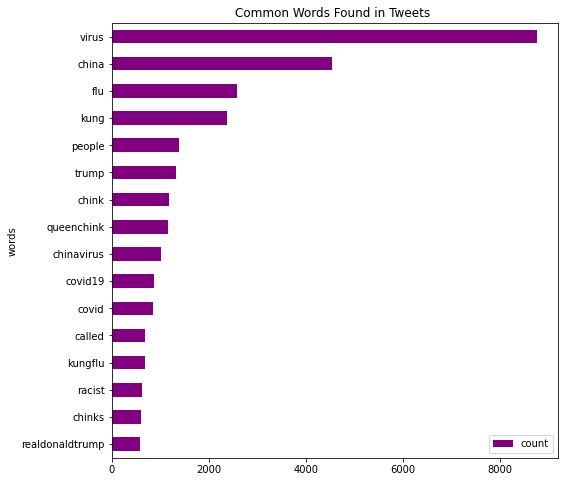

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_top.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")

ax.set_title("Common Words Found in Tweets ")

plt.show()

 **Similarity Analysis**

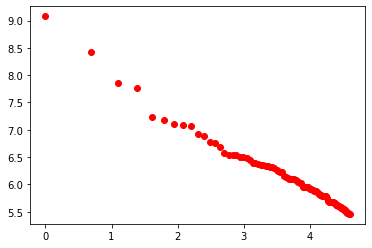

In [ ]:
import math
import matplotlib

logInds = []
logCounts = []
rank_word_count = []

for (ind, (word, count)) in enumerate(top_100):
    ind = ind+1
    rank_word_count.append((ind,word,count))
    logInds.append(math.log(ind))
    logCounts.append(math.log(count))

plt.plot(logInds,logCounts,'ro')

In [ ]:
print(rank_word_count[10])
print(rank_word_count[30])
print(rank_word_count[90])

(11, 'get', 986)
(31, 'still', 555)
(91, 'na', 257)


In [ ]:
# test if the data support Zipf’s law - using linear regression - expected result: b1 is close to -1.0

import sklearn as sklearn
from sklearn import linear_model
 
X = np.c_[logInds]
y = np.c_[logCounts]

model = linear_model.LinearRegression()
model.fit(X,y)
b0, b1 = model.intercept_[0], model.coef_[0][0]
b0,b1

(8.576931689394623, -0.6716945743295405)

In [ ]:
# Upload Attributes.csv file from your local

!rm Attributes*.csv
from google.colab import files
uploaded = files.upload()

rm: cannot remove 'Attributes*.csv': No such file or directory


Saving Attributes.csv to Attributes.csv


In [ ]:
#Reading the attributes.csv file
attributes_csv = pd.read_csv("Attributes.csv" )
print(attributes_csv)
attributes_csv= attributes_csv['Attributes'].tolist()
print(attributes_csv)

   Attributes
0        kung
1         flu
2        hate
3  chinavirus
4       wuhan
5     chinese
6       asian
7      indian
8       india
9        back
['kung', 'flu', 'hate', 'chinavirus', 'wuhan', 'chinese', 'asian', 'indian', 'india', 'back']


In [ ]:
# choosing only product name and reviews from the original dataframe
col_name = ['Text' ]
Taskc_op= hate_df[col_name]
Taskc_op.head()

,Text
0,@KaitMarieox Biden didn’t give it a racist nam...
1,"@hunzvi4 What about ""Kung flu""?"
2,@RamonSanchez18 “Kung Flu”?
3,#VaccineMandate\n\n#COVIDIOTS\n\n#coronavirus\...
4,@nytimes Some experts are pointing hopefully t...


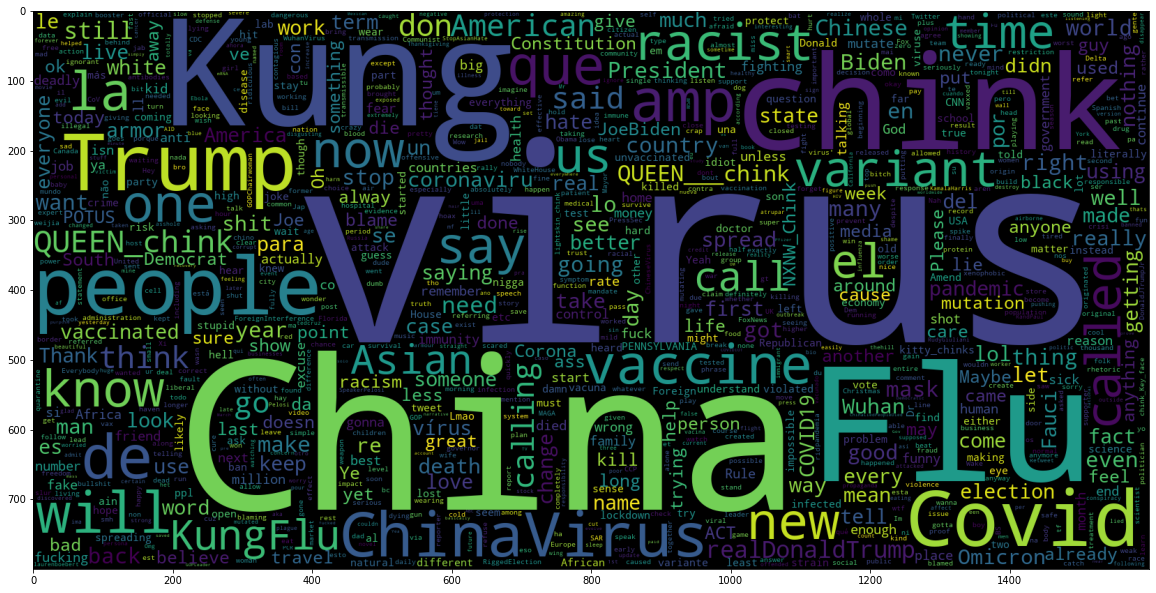

In [ ]:
from wordcloud import WordCloud
data = hate_df['Text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)

# **Spacy similarity Analysis**

In [ ]:
#common imports for spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=58d207db46661ec7cbcd38933af52d4450dc0c2ff2635aefa3a0cdc6b64dc8af
  Stored in directory: /tmp/pip-ephem-wheel-cache-dnch67dd/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import en_core_web_lg

nlp = en_core_web_lg.load()
  
#Create function to join tokenized words into a sentence 
def join_words(comment):
  return " ".join(comment)

#Map function on product reviews
hate_df['joined'] = hate_df['cleaned_tweets'].map(join_words)

In [ ]:
#Function to calculate similarity with pre-processing functions
def calculate_similarity(comment):
 
  base = nlp(comment)
  compare = nlp(input_attributes)
  return base.similarity(compare)

In [ ]:
input_list = ['kung', 'flu','chinese','chinavirus', 'wuhan', 'india', 'realdonaldtrump', 'chink']
input_attributes = " ".join(input_list)
hate_df['Spacy_similarity'] = hate_df['joined'].map(calculate_similarity)

/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

In [ ]:
#  based on spacy similarity
hate_df.sort_values(by='Spacy_similarity', ascending=False)[0:3]

,Datetime,Tweet_Id,Text,Username,Location,cleaned_tweets,joined,Spacy_similarity
301,2021-03-18 10:39:35+00:00,1372497908113813505,@Blunt_Maddness Wuhan Chinese Kung Flu virus,JohnFV,"Miami, Fl","[kung, virus, bluntmaddness, wuhan, chinese, flu]",kung virus bluntmaddness wuhan chinese flu,0.880142
816,2020-07-22 17:01:24+00:00,1285983293415002116,@SaskiaPopescu Ok it's the Wuhan Chinese Kung ...,JohnFV,"Miami, Fl","[kung, saskiapopescu, virus, ok, wuhan, chines...",kung saskiapopescu virus ok wuhan chinese flu,0.869495
2433,2020-03-18 21:39:13+00:00,1240392337978728449,@HillaryClinton Kung flu... from China,eli5isaac,United States,"[kung, china, hillaryclinton, flu]",kung china hillaryclinton flu,0.866230


# **Cosine Similarity**

In [ ]:
# make an array of tokenized words to vectorize for cosine similarity calculation
tweets_token= hate_df['cleaned_tweets']
tweets_token = np.array(tweets_token)
print(tweets_token[0])

['trump', 'biden', 'racist', 'kung', 'called', 'kitten', 'virus', 'china', '’', 'kaitmarieox', 'name', 'give', 'wuhan', 'flu', 'like', 'difference']


In [ ]:
# cosine similarity function
import numpy as np

def cosine_similarity_calc(vec_1,vec_2):
	cosine = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))
	return cosine

In [ ]:
# vectorize tokens and attributes and calculate cosine similarity
cosine_final =[]
for i in range(len(tweets_token)):
  vec_1 = []
  vec_2 = []
  
  #print(reviews_token[0])
  X_set = {w for w in tweets_token[i] if not w in tweets_token}
  Y_set = {w for w in attributes_csv }
  #print("X_Set is " ,X_set)
  #print("Y_Set is " ,Y_set)
  vector = X_set.union(Y_set) 
  for w in vector:
    if w in X_set: 
      vec_1.append(1) 
    else: 
      vec_1.append(0)
    if w in Y_set: 
      vec_2.append(1)
    else: 
      vec_2.append(0)
  cosine = cosine_similarity_calc(vec_1, vec_2)
  #print(cosine)
  cosine_final.append(cosine)
#print(cosine_final)
col3 = pd.DataFrame(cosine_final)
#print(col3)

In [ ]:
# Writing the code in to a csv file

Taskc_op['Cosine_similarity_score'] = col3
print(Taskc_op)
Taskc_op.to_csv("Taskc_op.csv", index = None)
# !ls
# from google.colab import files
# files.download("Taskc_op.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                                                    Text  Cosine_similarity_score
0      @KaitMarieox Biden didn’t give it a racist nam...                 0.237171
1                        @hunzvi4 What about "Kung flu"?                 0.365148
2                            @RamonSanchez18 “Kung Flu”?                 0.282843
3      #VaccineMandate\n\n#COVIDIOTS\n\n#coronavirus\...                 0.070711
4      @nytimes Some experts are pointing hopefully t...                 0.202260
...                                                  ...                      ...
18008      @__Chink I see getting naked that’s extra lit                 0.000000
18009  “If YOU think the devil cannot bring YOU down ...                 0.000000
18010              Chinks on torresdale over all these                   0.000000
18011  @seymourbutz_ i use to drop these mfs all the ...                 0.000000
18012  @collinsjacob1 Just a man and his will to survive                 0.000000

[18013 rows x 2

In [ ]:
#Reading the output file to a csv
cosine_df = pd.read_csv(r'Taskc_op.csv',sep=',', index_col=0)
cosine_df

,Cosine_similarity_score
Text,
"@KaitMarieox Biden didn’t give it a racist name like trump did, like when he called it the China virus, wuhan flu or Kung flu. There’s your difference kitten.",0.237171
"@hunzvi4 What about ""Kung flu""?",0.365148
@RamonSanchez18 “Kung Flu”?,0.282843
"#VaccineMandate\n\n#COVIDIOTS\n\n#coronavirus\n\nHere we go again with the bullshit.\n\nThere is no covid, this is a chinaflu or kungflu, get the name right idiots !😂🤣\n\nBlame china🇨🇳🇨🇳🇨🇳\n\nTypical asian season ! 🌅✈🌴",0.070711
"@nytimes Some experts are pointing hopefully to early signs that the Omicron chinese kung flu variant may cause only mild illness. But it is far too early to assume that the variant will not cause severe illness, too, warned doctors in South Africa.",0.202260
...,...
@__Chink I see getting naked that’s extra lit,0.000000
"“If YOU think the devil cannot bring YOU down by putting a chink in your armor, then YOU are already at RISK” Pastor Jeremy Morton #standfirm (1 Corinthians 15:58) Therefore, my dear…",0.000000
Chinks on torresdale over all these,0.000000


# **Vader Sentiment Analysis**

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

     |████████████████████████████████| 125 kB 5.2 MB/s 


In [ ]:
#function to calculate sentiment scores
def sentiment_analyzer_scores(sentence):
    """Generate sentiment score"""
    scores = analyser.polarity_scores(sentence)
    return scores['compound']

#perform sentiment analysis on product review and add to a new column
hate_df['sentiment'] = hate_df['Text'].map(sentiment_analyzer_scores)

In [ ]:
hate_df_sentiment=hate_df
hate_df_sentiment

,Datetime,Tweet_Id,Text,Username,Location,cleaned_tweets,joined,Spacy_similarity,sentiment
0,2021-11-29 00:08:27+00:00,1465110371442831360,@KaitMarieox Biden didn’t give it a racist nam...,blaise391,"Great Neck, NY","[trump, biden, racist, kung, called, kitten, v...",trump biden racist kung called kitten virus ch...,0.716468,-0.6369
1,2021-11-28 21:11:00+00:00,1465065715631804420,"@hunzvi4 What about ""Kung flu""?",SC_Blues_RESIST,"South Carolina, USA","[kung, hunzvi4, flu]",kung hunzvi4 flu,0.730928,-0.3818
2,2021-11-28 19:24:18+00:00,1465038861315330056,@RamonSanchez18 “Kung Flu”?,EvanMHarris,NJ,"[”, kung, “, ramonsanchez18, flu]",” kung “ ramonsanchez18 flu,0.566308,0.0000
3,2021-11-28 18:57:54+00:00,1465032219291000838,#VaccineMandate\n\n#COVIDIOTS\n\n#coronavirus\...,Assassi41090130,"Washington, DC","[vaccinemandate, chinaflu, asian, blame, https...",vaccinemandate chinaflu asian blame httpstcobe...,0.553580,-0.4374
4,2021-11-28 18:50:02+00:00,1465030237335474180,@nytimes Some experts are pointing hopefully t...,ny_tames,New York,"[africa, experts, variant, far, early, signs, ...",africa experts variant far early signs may hop...,0.572221,0.2989
...,...,...,...,...,...,...,...,...,...
18008,2019-01-26 16:32:36+00:00,1089199436545359873,@__Chink I see getting naked that’s extra lit,St0neC0ldSt0ner,NaN,"[’, naked, lit, see, extra, chink, getting]",’ naked lit see extra chink getting,0.398494,0.0000
18009,2019-01-26 14:41:43+00:00,1089171530897010688,“If YOU think the devil cannot bring YOU down ...,bretttroia,"Panama City Beach, FL","[corinthians, 1, dear…, devil, standfirm, 1558...",corinthians 1 dear… devil standfirm 1558 alrea...,0.396131,-0.6597
18010,2019-01-26 03:35:59+00:00,1089003992791814146,Chinks on torresdale over all these,Trasser_,NaN,"[httpstcok7zvmjt9qd, torresdale, chinks]",httpstcok7zvmjt9qd torresdale chinks,0.383809,0.0000
18011,2019-01-26 02:24:45+00:00,1088986068492472326,@seymourbutz_ i use to drop these mfs all the ...,chicago_chink,NaN,"[glass, whooped, got, use, time😭, seymourbutz,...",glass whooped got use time😭 seymourbutz mfs th...,0.326621,-0.8957


In [ ]:
## Merging the dataframes to have both sentiment and similarity scores
hate_sent_similar= pd.merge(hate_df_sentiment, cosine_df, on='Text')

In [ ]:
#Sorting the dataframe based on sentiment score
hate_sentiment =hate_sent_similar.sort_values(['sentiment','Spacy_similarity'], ascending=[False, False])
#hate_sentiment= hate_sentiment.dropna()
hate_sentiment.head(2)

,Datetime,Tweet_Id,Text,Username,Location,cleaned_tweets,joined,Spacy_similarity,sentiment,Cosine_similarity_score
806,2021-01-25 01:14:41+00:00,1353511574405836800,#China #CCP #KungFlu 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣😂😂😂😂...,BVodkasoda,"Washington, DC","[kungflu, dc, washington, china, 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...",kungflu dc washington china 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0.582836,0.9987,0.0
20296,2019-12-05 16:49:21+00:00,1202631052604383232,@ChavisHunter @chink_tweeter 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,OneWingedXngel,Void,"[flashbacks, chinktweeter, chavishunter, 🤣🤣🤣🤣🤣...",flashbacks chinktweeter chavishunter 🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0.076971,0.9947,0.0


In [ ]:
#Sorting the dataframe based on similarity score
hate_similarity =hate_sent_similar.sort_values(by='Cosine_similarity_score', ascending=False)
hate_similarity.head(5)
hate_similarity.to_csv("hate.csv", sep='|', index = None)
!ls
# from google.colab import files
# files.download("hate.csv")

Attributes.csv	    goback2yourcountry92.csv  sample_data
chinavirus5000.csv  hate.csv		      Taskc_op.csv
chink5000.csv	    kungflu2900.csv	      virus5000.csv


In [ ]:
network_df= hate_sentiment.copy()
network_df.head(3)

,Datetime,Tweet_Id,Text,Username,Location,cleaned_tweets,joined,Spacy_similarity,sentiment,Cosine_similarity_score
806,2021-01-25 01:14:41+00:00,1353511574405836800,#China #CCP #KungFlu 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣😂😂😂😂...,BVodkasoda,"Washington, DC","[kungflu, dc, washington, china, 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...",kungflu dc washington china 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0.582836,0.9987,0.0
20296,2019-12-05 16:49:21+00:00,1202631052604383232,@ChavisHunter @chink_tweeter 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,OneWingedXngel,Void,"[flashbacks, chinktweeter, chavishunter, 🤣🤣🤣🤣🤣...",flashbacks chinktweeter chavishunter 🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0.076971,0.9947,0.0
15892,2021-11-24 21:15:47+00:00,1463617364772143104,@viergot1 shut up yo bye😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,MelMillionss,NaN,"[viergot1, shut, yo, bye😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂]",viergot1 shut yo bye😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,0.345455,0.9943,0.0


In [ ]:
df_plotnetwork = hate_sentiment[["Location", "sentiment"]]
df_plotnetwork.head(2)
df_plotnetwork.to_csv('df_plotnetwork.csv')
# !ls
# from google.colab import files
# files.download("df_plotnetwork.csv")


In [ ]:
df_location = df_plotnetwork['Location']
df_location.to_csv('dflocations.csv')
# !ls
# from google.colab import files
# files.download("dflocations.csv")

In [ ]:
positive_sentivalues = df_plotnetwork[0:6081]
positive_sentivalues.Location = positive_sentivalues.Location.str.replace('\d+', '')
top_pos_senti= positive_sentivalues.nlargest(100,'sentiment')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128205 missing from current font.
  font.set_text(s, 0, flags=flags)


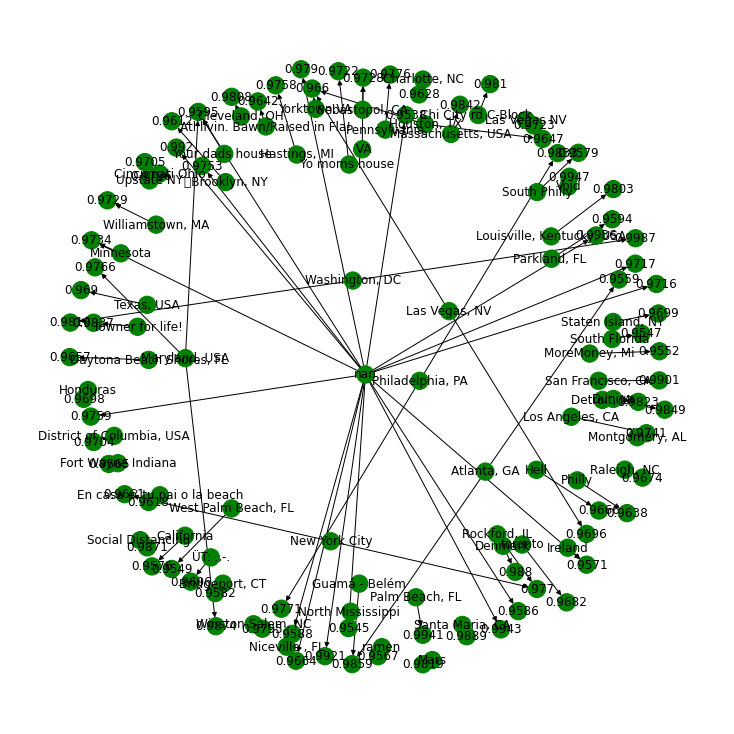

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(top_pos_senti, source='Location', target='sentiment',create_using=nx.DiGraph()) 
plt.rcParams['figure.figsize'] = 10, 10
color_map = ['red' if node == 'sentiment' else 'green' for node in G]   
pos=nx.spring_layout(G,scale=2) 
nx.draw(G, pos, node_color=color_map, with_labels=True)


# fig, ax = plt.subplots(figsize=(10, 8))
# pos = nx.spring_layout(G, k=2)
# # Plot networks
# nx.draw(G, pos,
#                  font_size=16,
#                  width=3,
#                  edge_color='grey',
#                  node_color='purple',
#                  with_labels = False,
#                  ax=ax)

# # Create offset labels
# for key, value in pos.items():
#     x, y = value[0]+.135, value[1]+.045
#     ax.text(x, y,
#             s=key,
#             horizontalalignment='center', fontsize=13)   
# plt.show()


In [ ]:
negitive_sentivalues= df_plotnetwork[13316:21456]
negitive_sentivalues.Location = negitive_sentivalues.Location.str.replace('\d+', '')
top_neg_senti= negitive_sentivalues.nlargest(200, 'sentiment')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128205 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127825 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128181 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128181 missing from current font.
  font.se

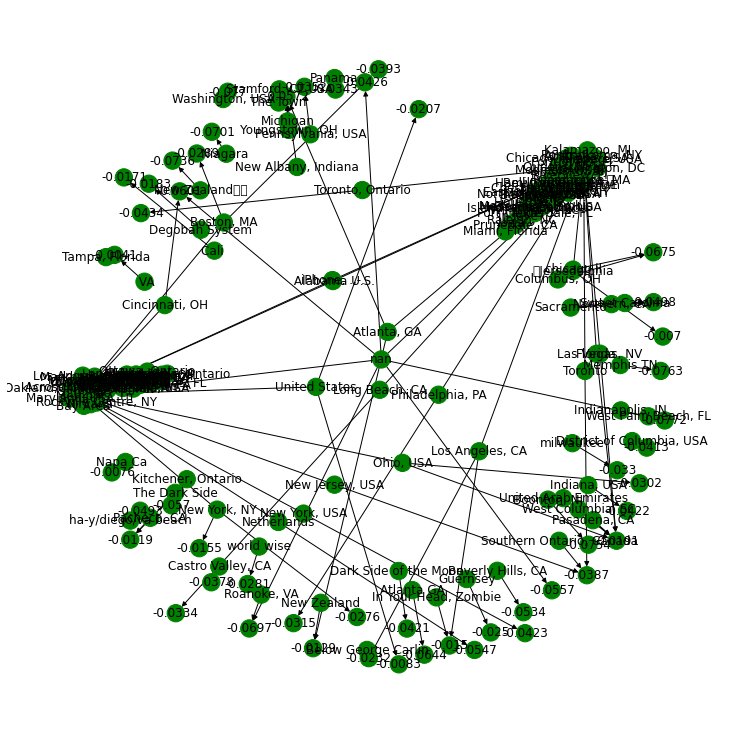

In [ ]:
F = nx.from_pandas_edgelist(top_neg_senti, source='Location', target='sentiment',create_using=nx.DiGraph()) 
plt.rcParams['figure.figsize'] = 10, 10
color_map = ['red' if node == 'sentiment' else 'green' for node in F]   
pos=nx.spring_layout(F,scale=20) 
nx.draw(F, node_color=color_map, with_labels=True)




In [ ]:
positive_sentivalues[['City', 'State']]= positive_sentivalues['Location'].str.split(',', n=1,  expand=True)
grouped_pos_senti = positive_sentivalues.groupby("sentiment")
grouped_lists = grouped_pos_senti["City"].apply(list)
grouped_lists = grouped_lists.reset_index()
#grouped_lists.loc[grouped_lists['sentiment'].idxmax(10)]
grouped_lists.nlargest(20, 'sentiment')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,sentiment,City
1630,0.9987,[Washington]
1629,0.9947,[Void]
1628,0.9943,[nan]
1627,0.9941,[Palm Beach]
1626,0.9936,[nan]
1625,0.9921,[nan]
1624,0.9920,"[nan, nan]"
1623,0.9901,[San Francisco]
1622,0.9889,[Santa Maria]
1621,0.9880,[Denmark]


In [ ]:
negitive_sentivalues[['City', 'State']]= negitive_sentivalues['Location'].str.split(',', n=1,  expand=True)
grouped_neg_senti = negitive_sentivalues.groupby("sentiment")
grouped_neg_lists = grouped_neg_senti["City"].apply(list)
grouped_neg_lists = grouped_neg_lists.reset_index()
#grouped_neg_lists.loc[grouped_lists['sentiment'].idxmax(10)]
grouped_neg_lists.nsmallest(40, 'sentiment')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,sentiment,City
0,-0.9982,[Camden]
1,-0.9969,[Daytona Beach Shores]
2,-0.9965,[Blumberg]
3,-0.9964,[nan]
4,-0.9870,[Reno]
5,-0.9865,[Texas]
6,-0.9848,[NJ side of City of Bro Love]
7,-0.9838,[Los Angeles]
8,-0.9836,"[nd ⭐️ to the Right. Neverland, nd ⭐️ to the R..."
9,-0.9835,[Los Angeles]


In [ ]:
print(nx.info(G))
print(nx.info(F))

DiGraph with 142 nodes and 89 edges
DiGraph with 199 nodes and 178 edges


In [ ]:
print("The transitivity of the network graph G is: ",nx.transitivity(G))
print("The transitivity of the network graph F is: ",nx.transitivity(F))

The transitivity of the network graph G is:  0
The transitivity of the network graph F is:  0


In [ ]:
print("The average clustering coefficient of the network graph G is: ",nx.average_clustering(G))
print("The average clustering coefficient of the network graph F is: ",nx.average_clustering(F))

The average clustering coefficient of the network graph G is:  0.0
The average clustering coefficient of the network graph F is:  0.0


In [ ]:
from operator import itemgetter
pr = nx.pagerank(G, alpha=0.5)
res = dict(sorted(pr.items(), key = itemgetter(1), reverse = True)[:10]) 
res

{0.9545: 0.008764593992679488,
 0.9571: 0.008764593992679488,
 0.9588: 0.008764593992679488,
 0.9595: 0.009719735251197355,
 0.966: 0.011461463428494644,
 0.9728: 0.011461463428494644,
 0.9734: 0.008764593992679488,
 0.9741: 0.011461463428494644,
 0.977: 0.010028751540717843,
 0.9859: 0.010028751540717843}

In [ ]:
from operator import itemgetter
pr = nx.pagerank(F, alpha=0.5)
res = dict(sorted(pr.items(), key = itemgetter(1), reverse = True)[:10]) 
res

{-0.0772: 0.007601902295470364,
 -0.0675: 0.00733974556909071,
 -0.0572: 0.013456735851282627,
 -0.0516: 0.09232221770382844,
 -0.0498: 0.009174842653748285,
 -0.0387: 0.00733974556909071,
 -0.0258: 0.08161748470999257,
 -0.0191: 0.011621638766625052,
 -0.0119: 0.00733974556909071,
 -0.0041: 0.00733974556909071}

In [ ]:
node = list(G.nodes())
clustering = (nx.clustering(G))
degree = (G.degree())
degree_centrality = (nx.degree_centrality(G))
closeness = (nx.closeness_centrality(G))
betweeness = (nx.betweenness_centrality(G))
pr = (nx.pagerank(G, alpha=0.5))

In [ ]:
nodeF = list(F.nodes())
clusteringF = (nx.clustering(F))
degreeF = (F.degree())
degree_centralityF = (nx.degree_centrality(F))
closenessF = (nx.closeness_centrality(F))
betweenessF = (nx.betweenness_centrality(F))
prF = (nx.pagerank(F, alpha=0.5))

In [ ]:
#creating a dataframe of all the features
df_G = pd.DataFrame(columns=['Location','clustering','degree','degree_centrality','closeness','betweeness','pr'])
df_F = pd.DataFrame(columns=['Location','clusteringF','degreeF','degree_centralityF','closenessF','betweenessF','prF'])
df_G.Location = node
df_F.Location = nodeF

In [ ]:
df_G

,Location,clustering,degree,degree_centrality,closeness,betweeness,pr
0,"Washington, DC",NaN,NaN,NaN,NaN,NaN,NaN
1,0.9987,NaN,NaN,NaN,NaN,NaN,NaN
2,Void,NaN,NaN,NaN,NaN,NaN,NaN
3,0.9947,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
137,South Florida,NaN,NaN,NaN,NaN,NaN,NaN
138,0.9547,NaN,NaN,NaN,NaN,NaN,NaN
139,North Mississippi,NaN,NaN,NaN,NaN,NaN,NaN
140,0.9545,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
clustering_list = []
pr_list = []
degree_centrality_list = []
closeness_list = []
betweeness_list = []
degree_list = []

for index, row in df_G.iterrows():
  if row['Location'] in list(G.nodes()):
    row[ 'clustering'] = clustering[row['Location']]
    row[ 'pr'] = pr[row['Location']]
    row['degree_centrality'] = degree_centrality[row['Location']]
    row[ 'closeness'] = closeness[row[ 'Location']]
    row[ 'betweeness'] = betweeness[row['Location']]
    row[ 'degree'] = degree[row['Location']]
  else:
    row['clustering'] = np.nan
    row[ 'pr'] = np.nan
    row['degree_centrality'] = np.nan
    row[ 'closeness' ] = np.nan
    row[ 'betweeness'] = np.nan
    row[ 'degree'] = np.nan

  clustering_list.append(row[ 'clustering'])
  pr_list.append(row['pr'])
  degree_centrality_list.append(row[ 'degree_centrality'])
  closeness_list.append(row[ 'closeness'])
  betweeness_list.append(row[ 'betweeness'])
  degree_list.append(row['degree'])

df_G.clustering = clustering_list
df_G.pr = pr_list
df_G.degree_centrality = degree_centrality_list
df_G.closeness = closeness_list
df_G.betweeness = betweeness_list
df_G.degree = degree_list

df_G.sort_values('degree', ascending=False)


,Location,clustering,degree,degree_centrality,closeness,betweeness,pr
4,NaN,0,17,0.120567,0.000000,0.000861,0.005731
95,0.966,0,3,0.021277,0.021277,0.000000,0.011461
17,"Maryland, USA",0,3,0.021277,0.000000,0.000000,0.005731
113,0.9595,0,3,0.021277,0.021277,0.000000,0.009720
0,"Washington, DC",0,2,0.014184,0.000000,0.000000,0.005731
...,...,...,...,...,...,...,...
43,Cincinnati Ohio,0,1,0.007092,0.000000,0.000000,0.005731
42,0.9803,0,1,0.007092,0.007092,0.000000,0.008596
41,"Louisville, Kentucky, USA",0,1,0.007092,0.000000,0.000000,0.005731
40,0.9808,0,1,0.007092,0.007092,0.000000,0.008596


In [ ]:
merged_df = pd.merge(network_df,df_G,on='Location',how='inner')
merged_df.tail(10)

,Datetime,Tweet_Id,Text,Username,Location,cleaned_tweets,joined,Spacy_similarity,sentiment,Cosine_similarity_score,clustering,degree,degree_centrality,closeness,betweeness,pr
4883,2020-11-09 12:54:56+00:00,1325783934337224704,TRUMP WINS AGAIN!\nDEFEATS CHINA VIRUS!,Famester26,South Florida,"[virus, china, wins, httpstcoz9e3csruhf, trump...",virus china wins httpstcoz9e3csruhf trump defeats,0.504778,0.4559,0.000000,0,1,0.007092,0.0,0.0,0.005731
4884,2020-11-04 21:13:44+00:00,1324097523301175298,"If @JoeBiden wins the presidency for Harris, h...",Famester26,South Florida,"[harris, presidency, hunterbidenlaptop, wins, ...",harris presidency hunterbidenlaptop wins china...,0.281936,0.4215,0.095346,0,1,0.007092,0.0,0.0,0.005731
4885,2020-10-23 19:06:44+00:00,1319716908053204997,"#CrookedJoe is lying ""live"" in Wilmington Dela...",Famester26,South Florida,"[year, lyingjoebiden, live, potus, peace, east...",year lyingjoebiden live potus peace east world...,0.558210,0.3400,0.000000,0,1,0.007092,0.0,0.0,0.005731
4886,2020-10-22 23:39:21+00:00,1319423125470195712,@ChrisCoons says Americans don't care that @J...,Famester26,South Florida,"[record, lockthemup, tonybobulinskididntkillhi...",record lockthemup tonybobulinskididntkillhimse...,0.505894,0.3120,0.000000,0,1,0.007092,0.0,0.0,0.005731
4887,2021-11-29 00:42:09+00:00,1465118850341646343,IMO the new variant virus might be found in Fl...,travels007,South Florida,"[months, florida, variant, cruise, world, migh...",months florida variant cruise world might wint...,0.341461,0.0000,0.000000,0,1,0.007092,0.0,0.0,0.005731
4888,2020-10-07 23:48:45+00:00,1313989671509262336,@LesbeAnne Another reason I'm not moving to Th...,Famester26,South Florida,"[another, live, asap, blue, im, besides, lesbe...",another live asap blue im besides lesbeanne ra...,0.499154,-0.4019,0.000000,0,1,0.007092,0.0,0.0,0.005731
4889,2020-10-13 09:20:58+00:00,1315945616841805824,@JoeTalkShow Right now having #TDS is worse th...,Famester26,South Florida,"[virus, china, joetalkshow, worse, tds, right]",virus china joetalkshow worse tds right,0.582103,-0.4767,0.000000,0,1,0.007092,0.0,0.0,0.005731
4890,2020-11-19 11:18:52+00:00,1329383638744576000,The only reason #DeathSantis is trending and C...,Famester26,South Florida,"[away, florida, yorkersjersey, corruptdemocrat...",away florida yorkersjersey corruptdemocrats ki...,0.486387,-0.4926,0.000000,0,1,0.007092,0.0,0.0,0.005731
4891,2020-11-06 14:16:38+00:00,1324717332107845632,I bet Hitlery is SO PISSED that she didn't thi...,Famester26,South Florida,"[virus, didnt, china, mail, pissed, vote, thin...",virus didnt china mail pissed vote think hitle...,0.473104,-0.9169,0.000000,0,1,0.007092,0.0,0.0,0.005731
4892,2021-03-21 18:19:49+00:00,1373700891900002306,@PaulStanleyLive Love the album. Great job. Im...,jaxxrocks,North Mississippi,"[though, disagree, certain, im, politics, far,...",though disagree certain im politics far ya top...,0.402820,0.9545,0.000000,0,1,0.007092,0.0,0.0,0.005731


In [ ]:
# cleaning the data by dropping na values 
final_df = merged_df.copy()
final_df = final_df.dropna()



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X = final_df[['clustering', 'pr', 'degree_centrality','betweeness','closeness', 'degree']]
y = final_df['Location']

model = ExtraTreesClassifier()
model.fit(X,y)

feature_importance = (pd.DataFrame(model.feature_importances_,index=X.columns,columns=['importance']).sort_values('importance', ascending=False))
print(feature_importance)


                   importance
degree_centrality    0.539303
degree               0.460697
clustering           0.000000
pr                   0.000000
betweeness           0.000000
closeness            0.000000


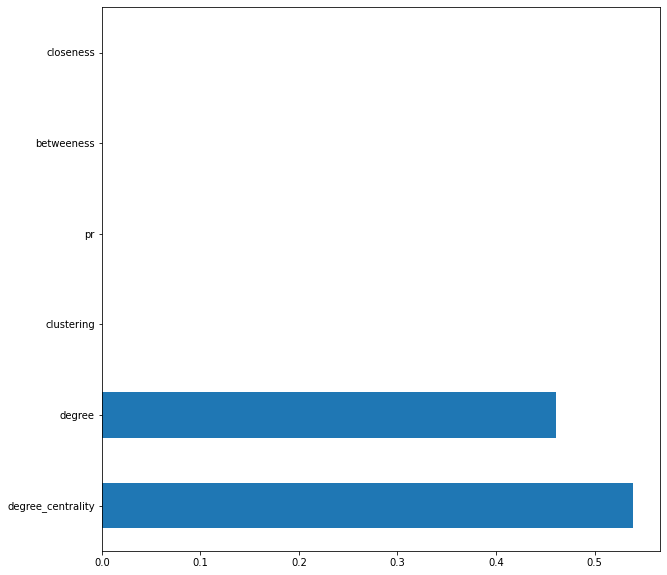

In [ ]:
feature_importances_series = pd.Series(model.feature_importances_,index=X.columns)
feature_importances_series.nlargest(9).plot(kind='barh')

In [ ]:
#load all the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

features = ['degree', 'degree_centrality']
X = final_df[features]
y = final_df.Location
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)
# Scaling using MinMaxScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
reg = LogisticRegression(C=0.0001, random_state=46) 
reg.fit(X_train_scaled, y_train)

pred = reg.predict(X_test_scaled)

# errs = metrics.mean_absolute_error(y_test, pred)
# errs



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
test_X = final_df[features]
test_X_scaled = scaler.fit_transform(test_X)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
test_y_pred = svr.predict(test_X_scaled)
test_df["review"] = test_y_pred

ValueError: ignored